# Lab 1 - New York City 5 Boroughs Crimes Data

Team:  Brian Gaither, Aurian Ghaemmaghami, Drew Larsen and Sabrina Purvis

# Model Creation and Understanding

We are exploring both Logistic Regression and Random Forest Classification to determine if crimes classify as either "Violent" or "Non-Violent". 

Accuracy and specificity will be our main benchmarks of model effectiveness as we are trying to correctly minimize our false positive rate of classifying a crime to be violent. Model effectiveness will be measured by an accuracy threshold of at least 70%, as well as, a specificity rate of 70%.

### Assumptions

In logistic regression, there are a few assumptions that must be considered.  
 - For this evaluation, we determined that we are solving for a binary classification of 'Violent' and 'Non-Violent' crimes.  In binary classification, the dependent variable must be binary; we must only have two outcomes. 
 - The second assumption to consider is independence.  The dataset may not use a method such as repeated measures.  Our dataset, as far as we understand, has measured unique, independent crime activities.
 - The third assumption or requirement is that the selected data must have little or no multicollinearity among the variables.  During our Exploratory Data Analysis, we did identify that we had correlation between months and temperature data.  We did not include the weather data in this modeling.  
 - A final requirement for logistic regression is a 'large' sample size.  At an original dataset of 1.4M observations, we comfortably met this metric.
 
No specific assumptions to be covered for Random Forest.

### Binary Variable Classification Curation

There were 64 unique possibilities of crimes that were recorded in our dataset. Initially, we explored different avenues of multi-class classification, but those techniques added higher complexity and class imbalances. Ultimately, we managed to classify all 64 different types of crimes into two main subgroups: Violent vs Non-Violent. 

Our team has leveraged https://www1.nyc.gov/site/nypd/stats/crime-statistics/crime-statistics-landing.page as a benchmark to accurately classify each of our unique crimes into the binary subgroup described above to continue on with our analysis. 

### Evaluation Metrics

In this report, we use many different measures to determine how accurate the model is. These measures are listed below: 
- TP: True positives. The number of positive cases that the model predicted correctly.
- TN: True negatives. The number of negative cases that the model predicted correctly.
- FP: False positives. The number of negative cases that the model incorrectly predicted as positive.
- FN: False negatives. The number of positive cases that the model incorrectly predicted as negative.
- Accuracy: The number of correctly classified cases divided by the total number of cases. 
- Precision: True positives divided by the sum of true positives and false positives. This answers the question “what is the percentage of positive cases that the model guessed correctly?”
- Recall / Sensitivity: True positives divided by the sum of true positives and false negatives. This answers the question “what percentage of those cases that the model predicted as positive were actually positive?”
- Specificity: True negatives divided by the sum of true negatives and false positives. This answers the question “what percentage of those cases that the model predicted as negative were actually negative?” This is analogous to sensitivity, but for the negative class. 
- F1: The F1 score. This is equal to (2 * Precision * Recall) / (Precision + Recall). This is the harmonic mean of precision and recall. Higher is better for F1 score, and it assumes that you want a balanced, maximized precision and recall. 
- Macro Average: Does not bring the class size into account when calculating the average of precision, recall and F1 score. 
- Weighted Average: Brings the class size into account when calculating the average of precision, recall and F1 score. 
- Support: The number of occurrences of each class in the test data. 

In this report, we are interested in balancing accuracy and precision. We are interested in predicting both crimes correctly, but we have a higher emphasis on predicting violent crime correctly than non-violent crime correctly. 

# Model 1 - Logistic Regression Model

### Model Description

A logistic regression model is similar to linear regression, but uses a logistic function to squish the results between 0 and 1 in order to force the model to predict a probability instead of any value. In the model, the behaviors of the variables are fairly similar to linear regression. Assuming that the data is normalized, a larger coefficient means that the variable is more important in the model and will have a larger effect on determining if the model predicts a 0 or a 1. 

For model 1, we employed Logistic Regression.  We completed the following:
 - The first activity that had to occur was data manipulation, to dummy encode our categorical variables.  
 - With a ratio of roughly 30/70 split on violent versus non-violent incidents, we also upsampled our dataset using SMOTE to balance it.
 - We scaled the model coefficients to normalize the weights.  This allowed us to determine a feature importance threshold to use as a cutoff point.

### Setting Up the Data

Load necessary packages

In [1]:
import pandas as pd
import numpy as np

Read data in

In [2]:
crime = pd.read_csv('Training_and_Test_Set.csv') # read in the csv %%file

Check object types to ensure that the data read in correctly

In [3]:
crime.dtypes #ensuring the data read in correctly

JURIS_DESC            object
BORO_NM               object
ADDR_PCT_CD          float64
LOC_OF_OCCUR_DESC     object
PREM_TYP_DESC         object
Day_Name              object
Duration             float64
Duration_to_PD       float64
Month                 object
Day                  float64
Year                 float64
Duration_lbl          object
Season                object
Daytime               object
GeoCell              float64
GeoCell_X            float64
GeoCell_Y            float64
y                      int64
dtype: object

Check dataframe to ensure that the data read in correctly

In [4]:
crime.head()

,JURIS_DESC,BORO_NM,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,Day_Name,Duration,Duration_to_PD,Month,Day,Year,Duration_lbl,Season,Daytime,GeoCell,GeoCell_X,GeoCell_Y,y
0,N.Y. POLICE DEPT,STATEN ISLAND,120.0,INSIDE,COMMERCIAL BUILDING,Friday,3.0,0.0,September,5.0,2014.0,Short,Fall,Morning,23.0,3.0,3.0,0
1,N.Y. POLICE DEPT,STATEN ISLAND,121.0,INSIDE,RESIDENCE-HOUSE,Sunday,1.0,0.0,December,27.0,2015.0,Short,Winter,Day,23.0,3.0,3.0,1
2,N.Y. POLICE DEPT,BRONX,43.0,INSIDE,RESIDENCE - APT. HOUSE,Sunday,14.0,171.0,September,1.0,2013.0,Medium,Fall,Night,78.0,8.0,8.0,0
3,N.Y. POLICE DEPT,BROOKLYN,75.0,INSIDE,RESIDENCE-HOUSE,Friday,6.0,28.0,October,10.0,2014.0,Short,Fall,Day,47.0,7.0,5.0,0
4,N.Y. POLICE DEPT,MANHATTAN,6.0,FRONT OF,STREET,Sunday,1.0,0.0,September,28.0,2014.0,Short,Fall,Early Morning,55.0,5.0,6.0,0


Value Counts by Crime Type. It is important to note the proportion of Violent vs Non-Violent crimes. Note that Non-Violent crime is a 0 here and Violent crime is a 1 here. 

In [5]:
crime['y'].value_counts()

0    365333
1    163540
Name: y, dtype: int64

Here we drop any remaining NAs

In [6]:
crime = crime.dropna() 

Here we confirm that we do not have any NAs in the dataframe

In [7]:
crime.isnull().values.any()

False

Information about the variables in the dataframe

In [8]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 528873 entries, 0 to 528872
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   JURIS_DESC         528873 non-null  object 
 1   BORO_NM            528873 non-null  object 
 2   ADDR_PCT_CD        528873 non-null  float64
 3   LOC_OF_OCCUR_DESC  528873 non-null  object 
 4   PREM_TYP_DESC      528873 non-null  object 
 5   Day_Name           528873 non-null  object 
 6   Duration           528873 non-null  float64
 7   Duration_to_PD     528873 non-null  float64
 8   Month              528873 non-null  object 
 9   Day                528873 non-null  float64
 10  Year               528873 non-null  float64
 11  Duration_lbl       528873 non-null  object 
 12  Season             528873 non-null  object 
 13  Daytime            528873 non-null  object 
 14  GeoCell            528873 non-null  float64
 15  GeoCell_X          528873 non-null  float64
 16  Ge

Perform one-hot enconding of the categorical data

In [9]:
# perform one-hot encoding of the categorical data on 'JURIS_DESC','BORO_NM','LOC_OF_OCCUR_DESC',
#'ADDR_PCT_CD','PREM_TYP_DESC','Day_Name','Month','Duration_lbl','Season','Daytime'
tmp_df = pd.get_dummies(crime.JURIS_DESC,prefix='JURIS_DESC')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.BORO_NM,prefix='BORO_NM')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.LOC_OF_OCCUR_DESC,prefix='LOC_OF_OCCUR_DESC')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.ADDR_PCT_CD,prefix='ADDR_PCT_CD')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.PREM_TYP_DESC,prefix='PREM_TYP_DESC')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.Day_Name,prefix='Day_Name')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.Month,prefix='Month')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.Duration_lbl,prefix='Duration_lbl')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.Season,prefix='Season')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.Daytime,prefix='Daytime')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

Check the number of variables of each type. 

In [10]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 528873 entries, 0 to 528872
Columns: 225 entries, JURIS_DESC to Daytime_Night
dtypes: float64(8), int64(1), object(9), uint8(207)
memory usage: 181.1+ MB


Here we drop the original variables, since we have one hot encoded them. 

In [11]:
if 'JURIS_DESC' in crime:    
    del crime['JURIS_DESC'] # get rid of the original category as it is now one-hot encoded
if 'BORO_NM' in crime:    
    del crime['BORO_NM'] # get rid of the original category as it is now one-hot encoded
if 'LOC_OF_OCCUR_DESC' in crime:    
    del crime['LOC_OF_OCCUR_DESC'] # get rid of the original category as it is now one-hot encoded
if 'ADDR_PCT_CD' in crime:    
    del crime['ADDR_PCT_CD'] # get rid of the original category as it is now one-hot encoded
if 'PREM_TYP_DESC' in crime:    
    del crime['PREM_TYP_DESC'] # get rid of the original category as it is now one-hot encoded
if 'Day_Name' in crime:    
    del crime['Day_Name'] # get rid of the original category as it is now one-hot encoded
if 'Month' in crime:    
    del crime['Month'] # get rid of the original category as it is now one-hot encoded
if 'Duration_lbl' in crime:    
    del crime['Duration_lbl'] # get rid of the original category as it is now one-hot encoded
if 'Season' in crime:    
    del crime['Season'] # get rid of the original category as it is now one-hot encoded
if 'Daytime' in crime:    
    del crime['Daytime'] # get rid of the original category as it is now one-hot encoded

Here, we confirm that we only have numeric data in our dataframe.

In [12]:
#confirming what was changed
pd.set_option('display.max_rows', 300)
crime.dtypes

Duration                                      float64
Duration_to_PD                                float64
Day                                           float64
Year                                          float64
GeoCell                                       float64
GeoCell_X                                     float64
GeoCell_Y                                     float64
y                                               int64
JURIS_DESC_AMTRACK                              uint8
JURIS_DESC_DEPT OF CORRECTIONS                  uint8
JURIS_DESC_HEALTH & HOSP CORP                   uint8
JURIS_DESC_LONG ISLAND RAILRD                   uint8
JURIS_DESC_METRO NORTH                          uint8
JURIS_DESC_N.Y. HOUSING POLICE                  uint8
JURIS_DESC_N.Y. POLICE DEPT                     uint8
JURIS_DESC_N.Y. STATE PARKS                     uint8
JURIS_DESC_N.Y. STATE POLICE                    uint8
JURIS_DESC_N.Y. TRANSIT POLICE                  uint8
JURIS_DESC_NEW YORK CITY SHE

### Balancing the Dataset

As noted previously, the dataset was not balanced.  Based on iterative testing, we determined that we would balance the data before fitting to optimize the results.

In [13]:
from sklearn.model_selection import ShuffleSplit

# we want to predict the X and y data as follows:
if 'y' in crime:
    y = crime['y'].values # get the labels we want
    del crime['y'] # get rid of the class label
    X = crime.values # use everything else to predict!

In [14]:
from imblearn.over_sampling import SMOTE
#transform (balance) the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X,y)

### Logistic Regression Model: Iteration 1

Here, we creating the object to do 3 fold cross validation.  We have defined an 80/20 split on the data.

In [15]:
num_cv_iterations = 3
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2)
                         
print(cv_object)

ShuffleSplit(n_splits=3, random_state=None, test_size=0.2, train_size=None)


Here, we create our initial logistic regression model

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt

# Creating the Logistic Regression Object
lr_clf = LogisticRegression(penalty='l2', C=1.0, class_weight=None, solver='liblinear' ) # get object

Initialize the iter_num variable for use in the cross validation for loop.

In [17]:
iter_num=0

Here, we use 3-fold cross validation to see how our model performs over multiple test/train splits. Accuracies and confusion matrices are similar for iteration 0, 1 and 2, so we can assume that our model is stable and we should expect to get a similar accuracy for each test set. 

In [18]:
for train_indices, test_indices in cv_object.split(X,y): 

    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    # train the reusable logistic regression model on the training data
    lr_clf.fit(X_train,y_train)  # train object
    y_hat = lr_clf.predict(X_test) # get test set precitions

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====")
    print("accuracy", acc )
    print("confusion matrix\n",conf)
    iter_num+=1

====Iteration 0  ====
accuracy 0.720065145688204
confusion matrix
 [[46318 26603]
 [14305 58908]]
====Iteration 1  ====
accuracy 0.7212079324455637
confusion matrix
 [[46254 26683]
 [14058 59139]]
====Iteration 2  ====
accuracy 0.7202772797569355
confusion matrix
 [[46125 26923]
 [13954 59132]]


Here, we print just the accuracies of the 3-fold cross validation models created above

In [19]:
#printing just accuracies
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(lr_clf, X, y=y, cv=cv_object) # this also can help with parallelism
print(accuracies)

[0.72073576 0.72031834 0.7200104 ]


Here we create some widges to change some of the parameters interactively


In [20]:
from ipywidgets import widgets as wd

def lr_explor(cost):
    lr_clf = LogisticRegression(penalty='l2', C=cost, class_weight=None,solver='liblinear') # get object
    accuracies = cross_val_score(lr_clf,X,y=y,cv=cv_object) # this also can help with parallelism
    print(accuracies)

wd.interact(lr_explor,cost=(0.001,5.0,0.05),__manual=True)

interactive(children=(FloatSlider(value=2.451, description='cost', max=5.0, min=0.001, step=0.05), Output()), …

<function __main__.lr_explor(cost)>

Here, we look at the weights of each variable in the model. Since these variables have not been normalized, we cannot directly compare them to look at how important each feature is. 

In [21]:
# iterate over the coefficients
weights = lr_clf.coef_.T # take transpose to make a column vector
variable_names = crime.columns
for coef, name in zip(weights,variable_names):
    print(name, 'has weight of', coef[0])
# by running the data model this way, we have not yet scaled the data - that step is next

Duration has weight of -0.3601683447015445
Duration_to_PD has weight of -8.100547245274758e-05
Day has weight of 0.0004950545386129448
Year has weight of 0.0014584226230348364
GeoCell has weight of 0.06751376843592302
GeoCell_X has weight of -0.061243412321698505
GeoCell_Y has weight of -0.6573069789615704
JURIS_DESC_AMTRACK has weight of 0.19521510714787588
JURIS_DESC_DEPT OF CORRECTIONS has weight of -0.02301964614738594
JURIS_DESC_HEALTH & HOSP CORP has weight of 0.795543007237152
JURIS_DESC_LONG ISLAND RAILRD has weight of -0.4084708685532135
JURIS_DESC_METRO NORTH has weight of 0.5242504844624156
JURIS_DESC_N.Y. HOUSING POLICE has weight of 0.18025844382085668
JURIS_DESC_N.Y. POLICE DEPT has weight of 0.26999542987233993
JURIS_DESC_N.Y. STATE PARKS has weight of 0.1184016801067178
JURIS_DESC_N.Y. STATE POLICE has weight of -0.28703137624220426
JURIS_DESC_N.Y. TRANSIT POLICE has weight of -0.40885884693122876
JURIS_DESC_NEW YORK CITY SHERIFF OFFICE has weight of 0.43885417769925544

We solve the above problem by scaling our variables and re-running our logistic regression. 

In [22]:
from sklearn.preprocessing import StandardScaler

# we want to normalize the features based upon the mean and standard deviation of each column. 
# However, we do not want to accidentally use the testing data to find out the mean and std (this would be snooping)
# to Make things easier, let's start by just using whatever was last stored in the variables:
##    X_train , y_train , X_test, y_test (they were set in a for loop above)

# scale attributes by the training set
scl_obj = StandardScaler()
scl_obj.fit(X_train) # find scalings for each column that make this zero mean and unit std
# the line of code above only looks at training data to get mean and std and we can use it 
# to transform new feature data

X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) # apply those means and std to the test set (without snooping at the test set values)

# train the model just as before
lr_clf = LogisticRegression(penalty='l2', C=0.05, solver='liblinear') # get object, the 'C' value is less (can you guess why??)
lr_clf.fit(X_train_scaled,y_train)  # train object

y_hat = lr_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf )

accuracy: 0.7198940698263238
[[46124 26924]
 [14009 59077]]


We sort the variables here to see what the most important variables are in our model. It seems that the duration of the crime is by far the most important variable in this model. 

In [23]:
# sort these attributes and spit them out
zip_vars = zip(lr_clf.coef_.T,crime.columns) # combine attributes
zip_vars = sorted(zip_vars)
for coef, name in zip_vars:
    print(name, 'has weight of', coef[0]) # now print them out

Duration has weight of -1.721097269901628
PREM_TYP_DESC_DEPARTMENT STORE has weight of -0.41277834055512275
Duration_lbl_Short has weight of -0.38411385523233255
PREM_TYP_DESC_CHAIN STORE has weight of -0.33129203448366246
PREM_TYP_DESC_CLOTHING/BOUTIQUE has weight of -0.2412480951496434
PREM_TYP_DESC_DRUG STORE has weight of -0.23603479941872502
LOC_OF_OCCUR_DESC_OPPOSITE OF has weight of -0.1654176372897688
LOC_OF_OCCUR_DESC_REAR OF has weight of -0.15581470403908013
PREM_TYP_DESC_FOOD SUPERMARKET has weight of -0.13919968791616946
PREM_TYP_DESC_COMMERCIAL BUILDING has weight of -0.10446136522579928
PREM_TYP_DESC_BANK has weight of -0.10382630678798865
PREM_TYP_DESC_GYM/FITNESS FACILITY has weight of -0.10066640404330983
PREM_TYP_DESC_ATM has weight of -0.08907862506805357
PREM_TYP_DESC_PARKING LOT/GARAGE (PRIVATE) has weight of -0.07161773847824265
PREM_TYP_DESC_TELECOMM. STORE has weight of -0.06949047593491796
PREM_TYP_DESC_STORE UNCLASSIFIED has weight of -0.06667494588365247
PRE

Here we plot variable importances. We can't get a lot of information out of this plot. It seems that the majority of variables have low importance, while a few variables are very important. Note duration at the far left of the plot. 

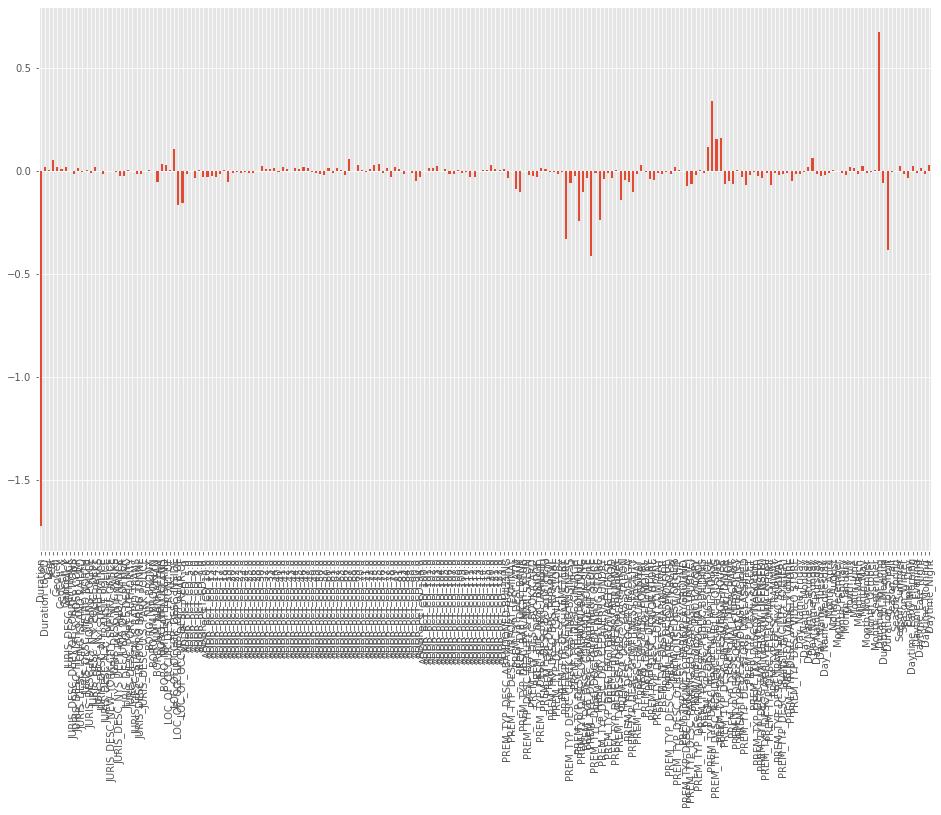

In [28]:
# now let's make a pandas Series with the names and values, and plot them
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


weights = pd.Series(lr_clf.coef_[0],index=crime.columns)
weights.plot(kind='bar', figsize = (16,10))
plt.show()

See precision, recall, F-measure and support for our normalized logistic regression model below. 

In [25]:
#Compute precision, recall, F-measure and support
from sklearn.metrics import *
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.77      0.63      0.69     73048
           1       0.69      0.81      0.74     73086

    accuracy                           0.72    146134
   macro avg       0.73      0.72      0.72    146134
weighted avg       0.73      0.72      0.72    146134



Below, we print out variable weights in a more readable list. 

In [26]:
zip_vars 

[(array([-1.72109727]), 'Duration'),
 (array([-0.41277834]), 'PREM_TYP_DESC_DEPARTMENT STORE'),
 (array([-0.38411386]), 'Duration_lbl_Short'),
 (array([-0.33129203]), 'PREM_TYP_DESC_CHAIN STORE'),
 (array([-0.2412481]), 'PREM_TYP_DESC_CLOTHING/BOUTIQUE'),
 (array([-0.2360348]), 'PREM_TYP_DESC_DRUG STORE'),
 (array([-0.16541764]), 'LOC_OF_OCCUR_DESC_OPPOSITE OF'),
 (array([-0.1558147]), 'LOC_OF_OCCUR_DESC_REAR OF'),
 (array([-0.13919969]), 'PREM_TYP_DESC_FOOD SUPERMARKET'),
 (array([-0.10446137]), 'PREM_TYP_DESC_COMMERCIAL BUILDING'),
 (array([-0.10382631]), 'PREM_TYP_DESC_BANK'),
 (array([-0.1006664]), 'PREM_TYP_DESC_GYM/FITNESS FACILITY'),
 (array([-0.08907863]), 'PREM_TYP_DESC_ATM'),
 (array([-0.07161774]), 'PREM_TYP_DESC_PARKING LOT/GARAGE (PRIVATE)'),
 (array([-0.06949048]), 'PREM_TYP_DESC_TELECOMM. STORE'),
 (array([-0.06667495]), 'PREM_TYP_DESC_STORE UNCLASSIFIED'),
 (array([-0.06405636]), 'PREM_TYP_DESC_PARKING LOT/GARAGE (PUBLIC)'),
 (array([-0.06403102]), 'PREM_TYP_DESC_RESTAU

### Logistic Regression Model: Iteration 2

For the next iteration of the model evaluation, we are using a subset of variables based on an importance threshold set at |.03| from the initial model created

In [29]:
import pandas as pd
import numpy as np

Read in the data

In [30]:
crime = pd.read_csv('Training_and_Test_Set.csv') # 

Double check that the data read in correctly

In [31]:
crime.dtypes #

JURIS_DESC            object
BORO_NM               object
ADDR_PCT_CD          float64
LOC_OF_OCCUR_DESC     object
PREM_TYP_DESC         object
Day_Name              object
Duration             float64
Duration_to_PD       float64
Month                 object
Day                  float64
Year                 float64
Duration_lbl          object
Season                object
Daytime               object
GeoCell              float64
GeoCell_X            float64
GeoCell_Y            float64
y                      int64
dtype: object

Value Counts by Crime Type

In [32]:
crime['y'].value_counts()

0    365333
1    163540
Name: y, dtype: int64

Drop any remaining NAs

In [33]:
crime = crime.dropna() 

Confirm that we have dropped all NAs

In [34]:
crime.isnull().values.any()

False

Perform one-hot encoding of the categorical variables

In [35]:
tmp_df = pd.get_dummies(crime.JURIS_DESC,prefix='JURIS_DESC')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.BORO_NM,prefix='BORO_NM')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.LOC_OF_OCCUR_DESC,prefix='LOC_OF_OCCUR_DESC')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.ADDR_PCT_CD,prefix='ADDR_PCT_CD')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.PREM_TYP_DESC,prefix='PREM_TYP_DESC')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.Day_Name,prefix='Day_Name')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.Month,prefix='Month')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.Duration_lbl,prefix='Duration_lbl')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.Season,prefix='Season')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.Daytime,prefix='Daytime')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

Drop the origninal categorical variables, since they are now one-hot encoded

In [36]:
if 'JURIS_DESC' in crime:    
    del crime['JURIS_DESC'] # get rid of the original category as it is now one-hot encoded
if 'BORO_NM' in crime:    
    del crime['BORO_NM'] # get rid of the original category as it is now one-hot encoded
if 'LOC_OF_OCCUR_DESC' in crime:    
    del crime['LOC_OF_OCCUR_DESC'] # get rid of the original category as it is now one-hot encoded
if 'ADDR_PCT_CD' in crime:    
    del crime['ADDR_PCT_CD'] # get rid of the original category as it is now one-hot encoded
if 'PREM_TYP_DESC' in crime:    
    del crime['PREM_TYP_DESC'] # get rid of the original category as it is now one-hot encoded
if 'Day_Name' in crime:    
    del crime['Day_Name'] # get rid of the original category as it is now one-hot encoded
if 'Month' in crime:    
    del crime['Month'] # get rid of the original category as it is now one-hot encoded
if 'Duration_lbl' in crime:    
    del crime['Duration_lbl'] # get rid of the original category as it is now one-hot encoded
if 'Season' in crime:    
    del crime['Season'] # get rid of the original category as it is now one-hot encoded
if 'Daytime' in crime:    
    del crime['Daytime'] # get rid of the original category as it is now one-hot encoded

Since we had so many variables with small coefficients after normalizing, we decided to remove some varialbes based on their coefficients in the original model. If the variable had a coefficient with an absolute value less than .03, we removed it from our second model. We targeted trying to no more than half of the original variables.  The reasoning was twofold.  We wanted to avoid overfitting the model and we expected speed to be improved with less variables.

In [37]:
X_sm = crime[[ 'PREM_TYP_DESC_HIGHWAY/PARKWAY', 'BORO_NM_MANHATTAN', 'BORO_NM_QUEENS', 'GeoCell_X', 'Year',
          'ADDR_PCT_CD_66.0', 'Day_Name_Saturday', 'LOC_OF_OCCUR_DESC_FRONT OF', 'PREM_TYP_DESC_PUBLIC BUILDING', 
          'PREM_TYP_DESC_RESIDENCE - PUBLIC HOUSING', 'PREM_TYP_DESC_RESIDENCE - APT. HOUSE', 
          'PREM_TYP_DESC_PUBLIC SCHOOL', 'Month_September', 'Duration', 'PREM_TYP_DESC_CONSTRUCTION SITE',
          'Duration_lbl_Medium', 'PREM_TYP_DESC_CEMETERY', 'PREM_TYP_DESC_CHURCH', 'PREM_TYP_DESC_DOCTOR/DENTIST OFFICE',
          'LOC_OF_OCCUR_DESC_INSIDE', 'LOC_OF_OCCUR_DESC_OPPOSITE OF', 'PREM_TYP_DESC_FERRY/FERRY TERMINAL',
          'PREM_TYP_DESC_GROCERY/BODEGA', 'PREM_TYP_DESC_CLOTHING/BOUTIQUE', 'PREM_TYP_DESC_ATM', 'PREM_TYP_DESC_AIRPORT TERMINAL',  'PREM_TYP_DESC_TAXI/LIVERY (UNLICENSED)',  'PREM_TYP_DESC_STORAGE FACILITY', 
          'PREM_TYP_DESC_PARK/PLAYGROUND', 'PREM_TYP_DESC_SHOE', 'PREM_TYP_DESC_RESIDENCE-HOUSE', 
          'PREM_TYP_DESC_PARKING LOT/GARAGE (PRIVATE)', 'ADDR_PCT_CD_18.0', 'PREM_TYP_DESC_GAS STATION',
          'Duration_lbl_Long', 'PREM_TYP_DESC_CHAIN STORE', 'PREM_TYP_DESC_TUNNEL', 'PREM_TYP_DESC_RESTAURANT/DINER',          'BORO_NM_BROOKLYN',  'PREM_TYP_DESC_JEWELRY',  'ADDR_PCT_CD_88.0',  'PREM_TYP_DESC_HOTEL/MOTEL', 
          'Season_Winter', 'PREM_TYP_DESC_FOOD SUPERMARKET', 'PREM_TYP_DESC_BOOK/CARD', 'PREM_TYP_DESC_FACTORY/WAREHOUSE',          'ADDR_PCT_CD_123.0',  'PREM_TYP_DESC_DRUG STORE',  'PREM_TYP_DESC_COMMERCIAL BUILDING', 
          'PREM_TYP_DESC_TAXI (LIVERY LICENSED)', 'ADDR_PCT_CD_111.0', 'ADDR_PCT_CD_5.0', 'ADDR_PCT_CD_7.0', 
          'ADDR_PCT_CD_110.0', 'ADDR_PCT_CD_9.0','y']]

Remove the target variable from the explanatory dataframe

In [38]:
from sklearn.model_selection import ShuffleSplit

# we want to predict the X and y data as follows:
if 'y' in X_sm:
    y = X_sm['y'].values # get the labels we want
    del X_sm['y'] # get rid of the class label
    X = X_sm.values # use everything else to predict!

Use SMOTE to balance the non-violent and violent crime types.

In [39]:
from imblearn.over_sampling import SMOTE

#transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X,y)

The next two code blocks confirm that X and y have the same number of lines after balancing the response variable

In [40]:
y.shape

(730666,)

In [41]:
X.shape

(730666, 55)

Here, we split the data for 3-fold cross validation.

In [42]:

num_cv_iterations = 3
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2)
                         
print(cv_object)

ShuffleSplit(n_splits=3, random_state=None, test_size=0.2, train_size=None)


Here is our logistic regression model on our important variables only

In [43]:
# run logistic regression and vary some parameters
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt

# first we create a reusable logisitic regression object
#   here we can setup the object with different learning parameters and constants
lr_clf = LogisticRegression(penalty='l2', C=1.0, class_weight=None, solver='liblinear' ) # get object

# now we can use the cv_object that we setup before to iterate through the 
#    different training and testing sets. Each time we will reuse the logisitic regression 
#    object, but it gets trained on different data each time we use it.

iter_num=0
# the indices are the rows used for training and testing in each iteration
for train_indices, test_indices in cv_object.split(X,y): 

    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    # train the reusable logisitc regression model on the training data
    lr_clf.fit(X_train,y_train)  # train object
    y_hat = lr_clf.predict(X_test) # get test set predictions

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====")
    print("accuracy", acc )
    print("confusion matrix\n",conf)
    iter_num+=1

====Iteration 0  ====
accuracy 0.6949785813020926
confusion matrix
 [[45787 27292]
 [17282 55773]]
====Iteration 1  ====
accuracy 0.6943490221303735
confusion matrix
 [[45823 27176]
 [17490 55645]]
====Iteration 2  ====
accuracy 0.6950470116468447
confusion matrix
 [[45891 27375]
 [17189 55679]]


The accuracies and confusion matrices are similar for iteration 0, 1 and 2, so we can assume that our model is stable and we should expect to get a similar accuracy for each test set. 

In [44]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(lr_clf, X, y=y, cv=cv_object) # this also can help with parallelism
print(accuracies)

[0.69298726 0.69540285 0.69488278]


Here we can change some of the parameters interactively

In [45]:
# 
from ipywidgets import widgets as wd

def lr_explor(cost):
    lr_clf = LogisticRegression(penalty='l2', C=cost, class_weight=None,solver='liblinear') # get object
    accuracies = cross_val_score(lr_clf,X,y=y,cv=cv_object) # this also can help with parallelism
    print(accuracies)

wd.interact(lr_explor,cost=(0.001,5.0,0.05),__manual=True)

interactive(children=(FloatSlider(value=2.451, description='cost', max=5.0, min=0.001, step=0.05), Output()), …

<function __main__.lr_explor(cost)>

Here, we have non-normalized weights for our second logistic regression model. Again, it's hard to compare the weights of each variable without normalizing them first. 

In [46]:
weights = lr_clf.coef_.T # take transpose to make a column vector
variable_names = X_sm.columns
for coef, name in zip(weights,variable_names):
    print(name, 'has weight of', coef[0])


PREM_TYP_DESC_HIGHWAY/PARKWAY has weight of -0.9764748521547805
BORO_NM_MANHATTAN has weight of -0.2910934329100317
BORO_NM_QUEENS has weight of -0.06016192554306433
GeoCell_X has weight of 0.02943764713882386
Year has weight of -0.0003093668678081344
ADDR_PCT_CD_66.0 has weight of -0.11737734180283581
Day_Name_Saturday has weight of 0.05367685997819227
LOC_OF_OCCUR_DESC_FRONT OF has weight of 1.0694268762653665
PREM_TYP_DESC_PUBLIC BUILDING has weight of 0.23174685626957087
PREM_TYP_DESC_RESIDENCE - PUBLIC HOUSING has weight of 0.7974076069482191
PREM_TYP_DESC_RESIDENCE - APT. HOUSE has weight of 1.0894530487314185
PREM_TYP_DESC_PUBLIC SCHOOL has weight of 1.2787122170383656
Month_September has weight of -0.047039802697769806
Duration has weight of -0.3476105405164881
PREM_TYP_DESC_CONSTRUCTION SITE has weight of -0.7130886269213892
Duration_lbl_Medium has weight of 0.8433529972874981
PREM_TYP_DESC_CEMETERY has weight of -0.02613377471080524
PREM_TYP_DESC_CHURCH has weight of -0.28589

Here, we normalize our variables so that they're all on the same scale. This allows for better comparison of how each variable affects the output of the model. 

In [47]:
from sklearn.preprocessing import StandardScaler

# we want to normalize the features based upon the mean and standard deviation of each column. 
#Start by just using whatever was last stored in the variables:
##    X_train , y_train , X_test, y_test (they were set in a for loop above)

# scale attributes by the training set
scl_obj = StandardScaler()
scl_obj.fit(X_train) # find scalings for each column that make this zero mean and unit std
# the line of code above only looks at training data to get mean and std and we can use it 
# to transform new feature data

X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) # apply those means and std to the test set

# train the model just as before
lr_clf = LogisticRegression(penalty='l2', C=.53, solver='liblinear') #optimal C was determined by the threshold code/graphics below
lr_clf.fit(X_train_scaled,y_train)  # train object

y_hat = lr_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf )

# sort these attributes and spit them out
zip_vars = zip(lr_clf.coef_.T,X_sm.columns) # combine attributes
zip_vars = sorted(zip_vars)
for coef, name in zip_vars:
    print(name, 'has weight of', coef[0]) # now print them out

accuracy: 0.6955807683359109
[[45841 27425]
 [17061 55807]]
Duration has weight of -1.6665911745478543
PREM_TYP_DESC_CHAIN STORE has weight of -0.2621541988319791
PREM_TYP_DESC_DRUG STORE has weight of -0.20223449481120054
PREM_TYP_DESC_CLOTHING/BOUTIQUE has weight of -0.19642397132936237
BORO_NM_MANHATTAN has weight of -0.12084276025756156
PREM_TYP_DESC_FOOD SUPERMARKET has weight of -0.11115454419462782
PREM_TYP_DESC_ATM has weight of -0.0821284265676635
PREM_TYP_DESC_PARKING LOT/GARAGE (PRIVATE) has weight of -0.05488816418173613
PREM_TYP_DESC_SHOE has weight of -0.04274862656192349
PREM_TYP_DESC_COMMERCIAL BUILDING has weight of -0.04145680886277899
Season_Winter has weight of -0.04078848992716342
ADDR_PCT_CD_111.0 has weight of -0.03199431526465211
ADDR_PCT_CD_110.0 has weight of -0.030578600662448014
PREM_TYP_DESC_GAS STATION has weight of -0.030218199678920102
PREM_TYP_DESC_JEWELRY has weight of -0.030191002185161547
BORO_NM_BROOKLYN has weight of -0.02955355984367942
PREM_TYP_D

This plot is much easier to read now that we removed some variables. Duration is still the most important variable in this model.

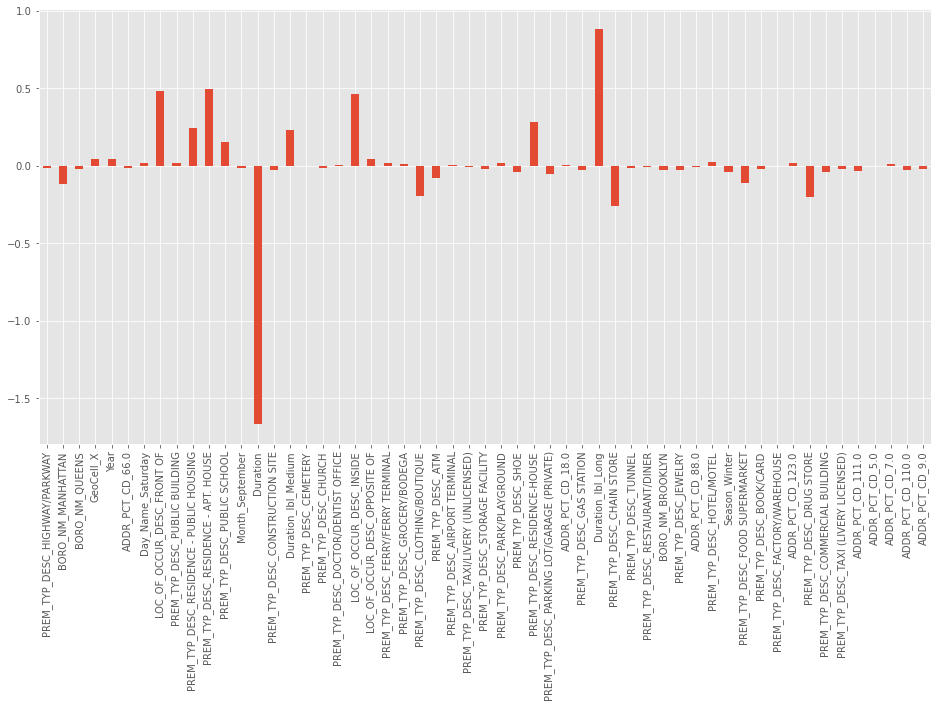

In [48]:
# now let's make a pandas Series with the names and values, and plot them
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


weights = pd.Series(lr_clf.coef_[0],index=X_sm.columns)
weights.plot(kind='bar', figsize = (16,8))  #added figsize - trying to see if it expands the view
plt.show()

Here, we create a function to get the best threshold for the training data. The model will output a number between 0 and 1. The point of this function is to see what threshold the model output should be above for us to classify it as violent crime. 

In [61]:
def getThreshold(y_test, probs, pos_label):
    probs = probs.T[1]
    actual = np.array([y_test == pos_label]).astype(int)[0]
    resultsdf = pd.DataFrame(data = {'Actual':actual, 'Probability':probs})
    tplist = []
    tnlist = []
    fplist = []
    fnlist = []
    threshlist = []
    for thresh in np.linspace(0,1,num=51):
        y_pred = probs > thresh
        tplist.append((resultsdf['Actual'] * y_pred).sum())
        tnlist.append(((1 - resultsdf['Actual']) * (1 - y_pred)).sum())
        fplist.append(((1 - resultsdf['Actual']) * y_pred).sum())
        fnlist.append((resultsdf['Actual'] * (1 - y_pred)).sum())
        threshlist.append(thresh)
    accdf = pd.DataFrame(data = {'Threshold':threshlist, 'TP':tplist, 'TN':tnlist, 'FP':fplist, 'FN':fnlist})
    accdf['Accuracy'] = (accdf['TP'] + accdf['TN']) / (accdf['TP'] + accdf['FP'] + accdf['TN'] + accdf['FN'])
    accdf['Precision'] = accdf['TP'] / (accdf['TP'] + accdf['FP'])
    accdf['Recall / Sensitivity'] = accdf['TP'] / (accdf['TP'] + accdf['FN'])
    accdf['Specificity'] = accdf['TN'] / (accdf['TN'] + accdf['TP'])
    accdf['F1'] = 2*((accdf['Precision'] * accdf['Recall / Sensitivity']) / (accdf['Precision'] + accdf['Recall / Sensitivity']))
    return accdf

Output of the threshold function. ~.52 to .54 maximizes best all the metrics, so we will proceed with using .53 as our threshold.

In [62]:
probs = lr_clf.predict_proba(X_test_scaled)
accdf = getThreshold(y_test, probs, pos_label = 1)
accdf

,Threshold,TP,TN,FP,FN,Accuracy,Precision,Recall / Sensitivity,Specificity,F1
0,0.00,73152,0,72982,0,0.500582,0.500582,1.000000,0.000000,0.667183
1,0.02,73105,1530,71452,47,0.510730,0.505717,0.999358,0.020500,0.671585
2,0.04,72936,4010,68972,216,0.526544,0.513967,0.997047,0.052114,0.678285
3,0.06,72652,6337,66645,500,0.540524,0.521562,0.993165,0.080226,0.683948
4,0.08,72377,8420,64562,775,0.552897,0.528535,0.989406,0.104212,0.689006
5,0.10,72052,11037,61945,1100,0.568581,0.537714,0.984963,0.132833,0.695654
6,0.12,71694,13749,59233,1458,0.584689,0.547588,0.980069,0.160914,0.702610
7,0.14,71385,16048,56934,1767,0.598307,0.556309,0.975845,0.183546,0.708638
8,0.16,71064,18108,54874,2088,0.610207,0.564278,0.971457,0.203068,0.713888
9,0.18,70743,19905,53077,2409,0.620307,0.571337,0.967069,0.219586,0.718305


In [49]:
#Compute precision, recall, F-measure and support
from sklearn.metrics import *
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.73      0.63      0.67     73266
           1       0.67      0.77      0.72     72868

    accuracy                           0.70    146134
   macro avg       0.70      0.70      0.69    146134
weighted avg       0.70      0.70      0.69    146134



#### Holdout Test Results

Here, we test our logistic regression against a 10% hold out set. These results will be used to directly compare out two models. 

In [50]:
holdout = pd.read_csv('Hold_Out_Set.csv')

No NAs, so we proceed

In [51]:
holdout.isnull().values.any()

False

Perform one-hot encoding of the categorical variables on the hold out set

In [52]:

tmp_df = pd.get_dummies(holdout.JURIS_DESC,prefix='JURIS_DESC')
holdout = pd.concat((holdout,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(holdout.BORO_NM,prefix='BORO_NM')
holdout = pd.concat((holdout,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(holdout.LOC_OF_OCCUR_DESC,prefix='LOC_OF_OCCUR_DESC')
holdout = pd.concat((holdout,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(holdout.ADDR_PCT_CD,prefix='ADDR_PCT_CD')
holdout = pd.concat((holdout,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(holdout.PREM_TYP_DESC,prefix='PREM_TYP_DESC')
holdout = pd.concat((holdout,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(holdout.Day_Name,prefix='Day_Name')
holdout = pd.concat((holdout,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(holdout.Month,prefix='Month')
holdout = pd.concat((holdout,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(holdout.Duration_lbl,prefix='Duration_lbl')
holdout = pd.concat((holdout,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(holdout.Season,prefix='Season')
holdout = pd.concat((holdout,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(holdout.Daytime,prefix='Daytime')
holdout = pd.concat((holdout,tmp_df),axis=1) # add back into the dataframe

Drop the categorical variables, as they have been one-hot encoded

In [53]:
if 'JURIS_DESC' in holdout:    
    del holdout['JURIS_DESC'] # get rid of the original category as it is now one-hot encoded
if 'BORO_NM' in holdout:    
    del holdout['BORO_NM'] # get rid of the original category as it is now one-hot encoded
if 'LOC_OF_OCCUR_DESC' in holdout:    
    del holdout['LOC_OF_OCCUR_DESC'] # get rid of the original category as it is now one-hot encoded
if 'ADDR_PCT_CD' in holdout:    
    del holdout['ADDR_PCT_CD'] # get rid of the original category as it is now one-hot encoded
if 'PREM_TYP_DESC' in holdout:    
    del holdout['PREM_TYP_DESC'] # get rid of the original category as it is now one-hot encoded
if 'Day_Name' in holdout:    
    del holdout['Day_Name'] # get rid of the original category as it is now one-hot encoded
if 'Month' in holdout:    
    del holdout['Month'] # get rid of the original category as it is now one-hot encoded
if 'Duration_lbl' in holdout:    
    del holdout['Duration_lbl'] # get rid of the original category as it is now one-hot encoded
if 'Season' in holdout:    
    del holdout['Season'] # get rid of the original category as it is now one-hot encoded
if 'Daytime' in holdout:    
    del holdout['Daytime'] # get rid of the original category as it is now one-hot encoded

Here, we eliminate variables that had a coefficient with an absolute value of less than .03 in our normalized first logistic regression model. 

In [54]:
holdout = holdout[[ 'PREM_TYP_DESC_HIGHWAY/PARKWAY', 'BORO_NM_MANHATTAN', 'BORO_NM_QUEENS', 'GeoCell_X', 'Year',
          'ADDR_PCT_CD_66.0', 'Day_Name_Saturday', 'LOC_OF_OCCUR_DESC_FRONT OF', 'PREM_TYP_DESC_PUBLIC BUILDING', 
          'PREM_TYP_DESC_RESIDENCE - PUBLIC HOUSING', 'PREM_TYP_DESC_RESIDENCE - APT. HOUSE', 
          'PREM_TYP_DESC_PUBLIC SCHOOL', 'Month_September', 'Duration', 'PREM_TYP_DESC_CONSTRUCTION SITE',
          'Duration_lbl_Medium', 'PREM_TYP_DESC_CEMETERY', 'PREM_TYP_DESC_CHURCH', 'PREM_TYP_DESC_DOCTOR/DENTIST OFFICE',
          'LOC_OF_OCCUR_DESC_INSIDE', 'LOC_OF_OCCUR_DESC_OPPOSITE OF', 'PREM_TYP_DESC_FERRY/FERRY TERMINAL',
          'PREM_TYP_DESC_GROCERY/BODEGA', 'PREM_TYP_DESC_CLOTHING/BOUTIQUE', 'PREM_TYP_DESC_ATM', 'PREM_TYP_DESC_AIRPORT TERMINAL',  'PREM_TYP_DESC_TAXI/LIVERY (UNLICENSED)',  'PREM_TYP_DESC_STORAGE FACILITY', 
          'PREM_TYP_DESC_PARK/PLAYGROUND', 'PREM_TYP_DESC_SHOE', 'PREM_TYP_DESC_RESIDENCE-HOUSE', 
          'PREM_TYP_DESC_PARKING LOT/GARAGE (PRIVATE)', 'ADDR_PCT_CD_18.0', 'PREM_TYP_DESC_GAS STATION',
          'Duration_lbl_Long', 'PREM_TYP_DESC_CHAIN STORE', 'PREM_TYP_DESC_TUNNEL', 'PREM_TYP_DESC_RESTAURANT/DINER',          'BORO_NM_BROOKLYN',  'PREM_TYP_DESC_JEWELRY',  'ADDR_PCT_CD_88.0',  'PREM_TYP_DESC_HOTEL/MOTEL', 
          'Season_Winter', 'PREM_TYP_DESC_FOOD SUPERMARKET', 'PREM_TYP_DESC_BOOK/CARD', 'PREM_TYP_DESC_FACTORY/WAREHOUSE',          'ADDR_PCT_CD_123.0',  'PREM_TYP_DESC_DRUG STORE',  'PREM_TYP_DESC_COMMERCIAL BUILDING', 
          'PREM_TYP_DESC_TAXI (LIVERY LICENSED)', 'ADDR_PCT_CD_111.0', 'ADDR_PCT_CD_5.0', 'ADDR_PCT_CD_7.0', 
          'ADDR_PCT_CD_110.0', 'ADDR_PCT_CD_9.0','y']]

Here, we remove the target variable from the explanatory data.

In [55]:
from sklearn.model_selection import ShuffleSplit

# we want to predict the X and y data as follows:
if 'y' in holdout:
    y = holdout['y'].values # get the labels we want
    del holdout['y'] # get rid of the class label
    X = holdout.values # use everything else to predict!

    ## X and y are now numpy matrices, by calling 'values' on the pandas data frames we
    #    have converted them into simple matrices to use with scikit learn

Here, we normalize the holdout set and use model 2 to predict violent or non-violent

In [56]:
from sklearn.preprocessing import StandardScaler

#scl_obj = StandardScaler()

holdout_test_scaled = scl_obj.transform(X) # apply those means and std to the test set (without snooping at the test set values)

y_holdout_hat = lr_clf.predict(holdout_test_scaled) # get test set precitions

acc = mt.accuracy_score(y,y_holdout_hat)
conf = mt.confusion_matrix(y,y_holdout_hat)
print('accuracy:', acc )
print(conf )

accuracy: 0.6703083520522769
[[25461 15107]
 [ 4267 13929]]


Finally, we compute precision, recall, F-measure and support for the hold out set. 

In [57]:
#Compute precision, recall, F-measure and support
from sklearn.metrics import *
print(classification_report(y,y_holdout_hat))

              precision    recall  f1-score   support

           0       0.86      0.63      0.72     40568
           1       0.48      0.77      0.59     18196

    accuracy                           0.67     58764
   macro avg       0.67      0.70      0.66     58764
weighted avg       0.74      0.67      0.68     58764



### Interpretation

#### Variable Importance

For our logistic regression model, we plot variables by their coefficients. As you can see, duration, a categorigal variable showing that the crime was defined as "long" and location being apartment seem to be the three most important indicators of violent or non-violent crime. Specifically, a crime taking place in an apartment is a fairly important indicator that the crime was violent, while a violent crime is less likely to have a long duration. We believe that this makes sense logically. A violent crime is more likely to take place in a household, due to the prevalence of domestic crime in the violent data set. A violent crime is likely to be short, while a non-violent crime is more likely to be longer due to the nature of these crimes. Since violent crime is our positive class, location being apartment will bring the output of the function closer to 1, while a longer duration will bring the output of the function closer to 0. 

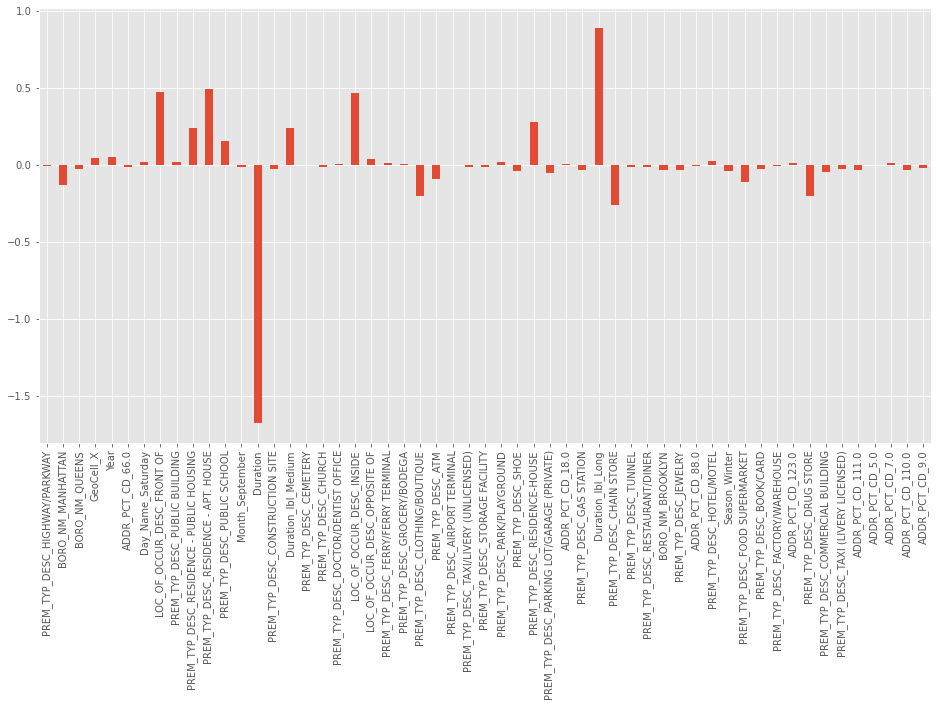

In [72]:
weights.plot(kind='bar', figsize = (16,8))  #added figsize - trying to see if it expands the view
plt.show()

#### ROC Curve

The Receiver Operating Curve (ROC) plots false positives on the x-axis and true positives on the y-axis. The point of this plot is to show the trade off between false positives and true positives as we increase the threshold for classifying a data point as negative or positive. The line going from (0,0) to (1,1) shows what the curve would look like if we simply flipped a coin to determine if the crime was violent or non-violent. The Area Under the Curve (AUC) metric tells us how good the model is performing. An AUC close to 1 is indicative of a model that predicts many more true positives than false positives. 

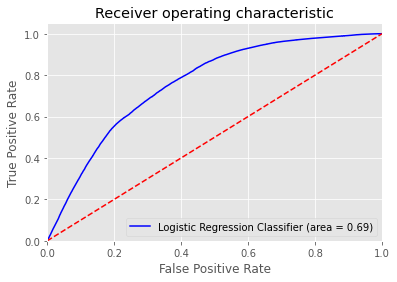

In [73]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

clf_roc_auc = roc_auc_score(y_test, lr_clf.predict(X_test_scaled))
fpr, tpr, thresholds = roc_curve(y_test, lr_clf.predict_proba(X_test_scaled)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression Classifier (area = %0.2f)' % clf_roc_auc, color = 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

#### Accuracy Measures

Below is a plot of the accuracy measures vs. the threshold used

In [77]:
import altair as alt
source = accdf
source['opt'] = .50

base = alt.Chart(source)

#red
acc= base.mark_line(color="#fc030f").encode(
    x='Threshold:Q',
    y='Accuracy:Q'
)
#green
prec = base.mark_line(color="#136e1a").encode(
    x='Threshold:Q',
    y='Precision:Q'
)
#blue
rec = base.mark_line(color="#3a3b9c").encode(
    x='Threshold:Q',
    y='Recall / Sensitivity:Q'
)
#orange
spec = base.mark_line(color="#ebac00").encode(
    x='Threshold:Q',
    y='Specificity:Q'
)

optimal = base.mark_rule().encode(
    x='opt'
)
acc+prec+rec+spec+optimal

alt.LayerChart(...)

# Model 2 - Random Forest Classification

### Model Description

We've developed a model using sklearn's Random Forest Classifier.  This model aims to perform a binary classification on each record.  The record is either a Violent crime (positive class) or a Non-Violent crime (negative class).

We followed the following steps in developing the model:

- Balance the classes using SMOTE
- One hot encoded the categoricals
- Scaled the continuous variables ensuring we scale the training set and then use the same scaler object to scale the test data and holdout data
- Evaluated the important features looking at gini-importance and reduced the overall variables in the model
- Performed a stratified kfold using 10 splits to ensure a stable accuracy measurement across all folds
- Then, we performed a Grid Search to determine the optimal hyperparameters with 3 folds for each of the 300 candidates resulting in 900 iterations
- Using the hyperparmeters of the best estimator, we fit the final model
- We then evaluated the thresholds and selected the best threshold that optimized precision, recall and accuracy
- Finally, we compared the performance against the hold out set so that we are comparing the two models against the same data

A random forest model is a collection of decision trees. This collection classifies a single data point as violent or non-violent by running the data point through each tree, tallying up the number of trees that classify the data points as violent or non-violent, then takes the majority vote of the trees to classify the data point. 

In the case of a single decision tree, the first split that the tree uses to classify the data will be the most important split. Using the most important variable will cause the data to be correctly classified faster on average than if we used a random variable. Being the second most important feature doesn’t automatically make it the second split. We would have to re run the Gini calculation after each side of the split to determine the most important variable. If the node in question is based on a continuous variable, the path that a data point travels down the decision tree will be determined by whether the variable was above or below a certain threshold. A node that is based on a binary variable will cause the data to go left or right depending on the value of the binary variable. 

### Data Manipulation

The following section loads the pre-processed data into a dataframe for further processing prior to feeding into the model for training.  There are two separate data files: 1) a larger dataset to be used for training and test data, and 2) a smaller dataset to be used as a hold out set.  Since we have multiple team members working on competing models, we're using the holdout set to compare each of the model's performance.

In [68]:
import altair as alt
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import metrics

#grab the dataset to begin model development
crime_file = "C:\\Users\\BGaither\\OneDrive - McAfee\\Other\\school\\SMU\\Courses\\Fall 2020\\Machine Learning I\\Mini-Lab\\Data\\Training_and_Test_Set.csv"
drew_crime_file = '/home/drew/School/Semester4/ML1/NewYorkCityCrimes2015/Mini_Lab_Individual_Files/Brian/Data/Training_and_Test_Set.csv'
df_Crime = pd.read_csv(crime_file)

hold_out_file = "C:\\Users\\BGaither\\OneDrive - McAfee\\Other\\school\\SMU\\Courses\\Fall 2020\\Machine Learning I\\Mini-Lab\\Data\\Hold_Out_Set.csv"
drew_hold_out_file = '/home/drew/School/Semester4/ML1/NewYorkCityCrimes2015/Mini_Lab_Individual_Files/Brian/Data/Hold_Out_Set.csv'
df_holdout = pd.read_csv(hold_out_file)

Looking at the dataset to be used for training and test, we can see the original data is imbalanced with 365,333 records for the negative class (Non-Violent crimes) and 165,540 records for the positive class (Violent crimes).

In [69]:
#evaluate class imbalance
df_Crime['y'].value_counts()

0    365333
1    163540
Name: y, dtype: int64

Next, we assign our X (independent variables) and y (dependent variable) for further processing.

In [70]:
#set up our X and y variables
X = df_Crime[['JURIS_DESC','BORO_NM','ADDR_PCT_CD','LOC_OF_OCCUR_DESC','PREM_TYP_DESC','Day_Name','Duration','Duration_to_PD','Month','Day','Year','Duration_lbl','Season','Daytime','GeoCell','GeoCell_X','GeoCell_Y']]
y = df_Crime[['y']]

Since we have an imbalanced dataset, we chose SMOTE to balance the dataset for training and test.  SMOTE was used as it has the ability to synthesize new samples for the minority class.  In this case, our positive class (Violent Crimes) is the minority class.  We chose to use SMOTE instead of simply oversampling (or creating copies) of the minority class records as the copy of data approach doesn't add any new information to the model.  Whereas SMOTE is creating new synthesized samples for the minority class.

Also, prior to using SMOTE, we one hot encode the categorical variables and continue to use these one hot encoded variables for the Random Forest model itself.

You can see from the output of the code below that we now have a balanced dataset post SMOTE.

In [71]:
#first, let's balance the classes

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, OneHotEncoder

columns_to_encode = ['JURIS_DESC','BORO_NM','LOC_OF_OCCUR_DESC','ADDR_PCT_CD','PREM_TYP_DESC','Day_Name','Month','Duration_lbl','Season','Daytime']
columns_no_change = ['Duration','Duration_to_PD','Day','Year','GeoCell','GeoCell_X','GeoCell_Y']

df_existing = X[columns_no_change]
existing_cols = df_existing.to_numpy()

#encoder 
ohe = OneHotEncoder(sparse=False)

#ohe separate columns
encoded_columns = ohe.fit_transform(X[columns_to_encode])

#concatenate processed columns back together for X_train
X = np.concatenate([encoded_columns,existing_cols],axis=1)

#get the column names back to the dataframe
df1 = pd.DataFrame(X)
feature_names = ohe.get_feature_names().tolist()
col_names = feature_names+columns_no_change
df1.columns = col_names
X = df1

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

columns = X_train.columns

os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of non-violent in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of viloent",len(os_data_y[os_data_y['y']==1]))
print("Proportion of non-violent data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of violent data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  584782
Number of non-violent in oversampled data 292391
Number of viloent 292391
Proportion of non-violent data in oversampled data is  0.5
Proportion of violent data in oversampled data is  0.5


We have two continuous variables that we've decided to scale prior to feeding into the model for training.  Note that we scale the training data first, then use the scaler object that was fit on the training data to subsequently scale the test data.  This is to avoid data leakage.

In [72]:
#scale specific columns
from sklearn.preprocessing import StandardScaler, OneHotEncoder

#go ahead and split the data so we can scale data separately on training and then on test so we don't have leakage
X_train, X_test, y_train, y_test = train_test_split(os_data_X, os_data_y, test_size=0.2, random_state=0)

columns_to_scale = ['Duration','Duration_to_PD']
#get a list of all columns without the columns to scale above
lstCols = os_data_X.columns.values.tolist()
lstCols.remove('Duration')
lstCols.remove('Duration_to_PD')
columns_no_change = lstCols

df_existing = X_train[columns_no_change]
existing_cols = df_existing.to_numpy()

#scaler
scaler = StandardScaler()

#scale and encode separate columns
scaled_columns = scaler.fit_transform(X_train[columns_to_scale])

#concatenate processed columns back together for X_train
X_train_np = np.concatenate([scaled_columns,existing_cols],axis=1)

df_existing = X_test[columns_no_change]
existing_cols = df_existing.to_numpy()

#separately scale X_test
scaled_columns = scaler.transform(X_test[columns_to_scale]) #use the fit scaler object from X_train to scale X_test

X_test_np = np.concatenate([scaled_columns,existing_cols],axis=1)

Next, we pull the transformed data back into a pandas dataframe along with the original column names as this will be helpful later when evaluating feature importance and selecting columns from the dataset.

In [73]:
#convert the numpy array back to a pandas dataframe for X_train
df1 = pd.DataFrame(X_train_np)
#get the column names back to the dataframe
#feature_names = ohe.get_feature_names().tolist()
col_names = columns_to_scale+columns_no_change
df1.columns = col_names
X_train = df1

#convert the numpy array back to a pandas dataframe for X_test
df1 = pd.DataFrame(X_test_np)
#get the column names back to the dataframe
#feature_names = ohe.get_feature_names().tolist()
col_names = columns_to_scale+columns_no_change
df1.columns = col_names
X_test = df1

Since we have a holdout set, we also need to get the holdout dataset into the same format as the training and test data.  Note, we again use the same scaler object used on the training set to avoid data leakage.

In [74]:
#prep the hold out set
from sklearn.preprocessing import StandardScaler, OneHotEncoder

columns_to_encode = ['JURIS_DESC','BORO_NM','LOC_OF_OCCUR_DESC','ADDR_PCT_CD','PREM_TYP_DESC','Day_Name','Month','Duration_lbl','Season','Daytime']
columns_no_change = ['Duration','Duration_to_PD','Day','Year','GeoCell','GeoCell_X','GeoCell_Y']

X_holdout = df_holdout[['JURIS_DESC','BORO_NM','ADDR_PCT_CD','LOC_OF_OCCUR_DESC','PREM_TYP_DESC','Day_Name','Duration','Duration_to_PD','Month','Day','Year','Duration_lbl','Season','Daytime','GeoCell','GeoCell_X','GeoCell_Y']]
y_holdout = df_holdout[['y']]

df_existing = X_holdout[columns_no_change]
existing_cols = df_existing.to_numpy()

#encoder 
ohe = OneHotEncoder(sparse=False)

#ohe separate columns
encoded_columns = ohe.fit_transform(X_holdout[columns_to_encode])

#concatenate processed columns back together for X_train
X_holdout = np.concatenate([encoded_columns,existing_cols],axis=1)

#get the column names back to the dataframe
df1 = pd.DataFrame(X_holdout)
feature_names = ohe.get_feature_names().tolist()
col_names = feature_names+columns_no_change
df1.columns = col_names
X_holdout = df1

columns_to_scale = ['Duration','Duration_to_PD']
#get a list of all columns without the columns to scale above
lstCols = X_holdout.columns.values.tolist()
lstCols.remove('Duration')
lstCols.remove('Duration_to_PD')
columns_no_change = lstCols

df_existing = X_holdout[columns_no_change]
existing_cols = df_existing.to_numpy()

#separately scale X_holdout
scaled_columns = scaler.transform(X_holdout[columns_to_scale]) #use the fit scaler object from X_train to scale X_test

X_holdout_np = np.concatenate([scaled_columns,existing_cols],axis=1)

#convert the numpy array back to a pandas dataframe for X_train
df1 = pd.DataFrame(X_holdout_np)
#get the column names back to the dataframe
#feature_names = ohe.get_feature_names().tolist()
col_names = columns_to_scale+columns_no_change
df1.columns = col_names
X_holdout = df1

Based on a prior iteration of training a Random Forest Classifier model, we've chosen the more important features based on the gini-importance to use in further model development.  These features are selected below.

In [75]:
#columns to keep based on evaluating gini-importance from a prior run
cols = ['Duration','x0_HEALTH & HOSP CORP','x0_N.Y. POLICE DEPT','x1_MANHATTAN','x1_STATEN ISLAND','x4_ABANDONED BUILDING','x4_ATM','x4_BANK','x4_BAR/NIGHT CLUB','x4_BEAUTY & NAIL SALON','x4_BUS (NYC TRANSIT)','x4_BUS (OTHER)','x4_BUS STOP','x4_BUS TERMINAL','x4_CANDY STORE','x4_CHAIN STORE','x4_CHECK CASHING BUSINESS','x4_CLOTHING/BOUTIQUE','x4_COMMERCIAL BUILDING','x4_DEPARTMENT STORE','x4_DOCTOR/DENTIST OFFICE','x4_DRUG STORE','x4_FACTORY/WAREHOUSE','x4_FAST FOOD','x4_FERRY/FERRY TERMINAL','x4_FOOD SUPERMARKET','x4_GROCERY/BODEGA','x4_GYM/FITNESS FACILITY','x4_HOSPITAL','x4_HOTEL/MOTEL','x4_JEWELRY','x4_LIQUOR STORE','x4_OTHER','x4_PARK/PLAYGROUND','x4_PRIVATE/PAROCHIAL SCHOOL','x4_PUBLIC BUILDING','x4_PUBLIC SCHOOL','x4_RESIDENCE - APT. HOUSE','x4_RESIDENCE - PUBLIC HOUSING','x4_RESIDENCE-HOUSE','x4_RESTAURANT/DINER','x4_SHOE','x4_SOCIAL CLUB/POLICY','x4_STREET','x4_TELECOMM. STORE','x4_VARIETY STORE','x5_Saturday','x5_Sunday','x6_July','x6_May','x8_Summer','x9_Day']

X_train=X_train[cols]
y_train=y_train['y']

X_test = X_test[cols]
y_test=y_test['y']

X_holdout=X_holdout[cols]
y_holdout=y_holdout['y']

### k-fold Cross Validation

Next, we create a base model and perform a 10-fold cross validation to evaluate the accuracy across each of the folds to ensure we have a stable model.  As can be seen by the output from the code below, we consistently have a 77% model accuracy.

In [76]:
#perform 10 fold cross validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

#split into training and test -- I skip here because I already have the data split above
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
clf = RandomForestClassifier(n_estimators = 50, random_state = 0)

kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
cv_results = cross_val_score(clf, X_train, y_train.values.ravel(), cv=kfold, scoring='accuracy')
print('Cross Validation Results: {}'.format(cv_results))

Cross Validation Results: [0.77260971 0.77925742 0.77626488 0.77081418 0.7778039  0.77559745
 0.77437903 0.77619597 0.77683725 0.77640973]


### Grid Search

Next, we perform a grid search to evaluate the most optimal hyperparameters that lead to a model that performs well and is not overfit.  Below, we experiment with 5 different hyperparameters with a range of values for each.  The parameters below were chosen as they are crutial levers to control for overfit.  

- n_estimators: determines the number of trees that can be in the forest
- criterion: this determines the function to measure the quality of a split (gini or entropy)
- max_depth: This determines the depth of the tree. Trees that are too deep have risk to overfit
- max_features: This refers to the number of features to consider when looking for the best split
- min_samples_spit: This determines the minimum number of samples required to split an internal node

In [77]:
#Set up the parameters for grid search
parameters = {'n_estimators' : (10,30,50,70,90),
              'criterion' : ('gini','entropy'),
              'max_depth' : (3,5,7,9,10),
              'max_features' : ('auto','sqrt'),
              'min_samples_split' : (2,4,6)
             }

In [78]:
#set up grid search object
clf_grid = GridSearchCV(RandomForestClassifier(n_jobs=-1,oob_score=False),param_grid=parameters,cv=3,verbose=True)

In [79]:
clf_grid_model = clf_grid.fit(X_train,y_train.values.ravel())

Fitting 3 folds for each of 300 candidates, totalling 900 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed: 45.5min finished


### Parameters

As can be seen from the output of the above cell, 3 folds were fit for each of the 300 candidates totalling 900 fits.  The best hyperparmeters for the model is output below.

- criterion: entropy
- max_depth: 10
- min_samples_split: 6
- n_estimators: 90
- n_jobs: -1 (number of jobs to run in parallel.  -1 means using all processors)

In [80]:
#identify optimal hyperparameters
clf_grid_model.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=6,
                       n_estimators=90, n_jobs=-1)

Below, we can see the accuracy for the best model with the optimal hyperparmeters is .76

In [81]:
#what is the best score for the optimal hyperpameters
clf_grid_model.best_score_

0.7663057762188737

Next, we fit a new Random Forest Classifier model using the optimal hyperparameters identified above.

In [82]:
#create a Random Forest Classifier object using the optimal hyperparameters
clf = RandomForestClassifier(bootstrap=True,
                             class_weight=None,
                             criterion= 'gini',
                             max_depth= 10,
                             max_features= 'sqrt',
                             max_leaf_nodes=None,
                             min_impurity_decrease=0.0,
                             min_impurity_split=None,
                             min_samples_leaf=1,
                             min_samples_split= 6,
                             min_weight_fraction_leaf=0.0,
                             n_estimators= 90,
                             n_jobs=-1,
                             oob_score=False,
                             random_state=0,
                             verbose=0,
                             warm_start=False
                            )

In [83]:
#train the random forest classifier using the optimal hyperparmeters
clf.fit(X_train,y_train.values.ravel())

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_split=6,
                       n_estimators=90, n_jobs=-1, random_state=0)

### Test the best model

In [84]:
y_pred = clf.predict(X_test)

By observing the accuracy on the training and test data, we can see the accuracy is identical between the two which indicates we have a model that appears to not be overfit. However, we do see the accuracy on the holdout set is slightly lower.

In [85]:
#evaluate the accuracy of the Random Forest Classifier across training, test, and hold out set
print(f'Test Accuracy: {clf.score(X_test, y_test):.3f}')
print(f'Train Accuracy: {clf.score(X_train, y_train):.3f}')
print(f'Holdout Accuracy: {clf.score(X_holdout, y_holdout):.3f}')

Test Accuracy: 0.759
Train Accuracy: 0.759
Holdout Accuracy: 0.707


### Test Set Results

Looking at precision we can see that when the model makes a classification, the model is correct 74% of the time on the positive class which is promising.  (Precision = TP/(TP+FP)).  Looking at recall, we also see promising results with 77% on the positive class.  (Recall = TP/(TP/FN))

In [86]:
#classification report on y_test
from sklearn.metrics import *

#Compute precision, recall, F-measure and support
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.73      0.75     58478
           1       0.74      0.79      0.77     58479

    accuracy                           0.76    116957
   macro avg       0.76      0.76      0.76    116957
weighted avg       0.76      0.76      0.76    116957



### Holdout Set Results

We see less than spectacular preceision on the positive class when applying the model to the holdout set with 52%. Recall has also reduced to 65%.  This may indicate the model still may be overfit as it does quite well on training and test, but less accurate on unseen data.

In [87]:
#classification report on y_holdout
y_pred_holdout = clf.predict(X_holdout)
print(classification_report(y_holdout,y_pred_holdout))

              precision    recall  f1-score   support

           0       0.82      0.73      0.78     40568
           1       0.52      0.65      0.58     18196

    accuracy                           0.71     58764
   macro avg       0.67      0.69      0.68     58764
weighted avg       0.73      0.71      0.71     58764



### Feature Importance

In [88]:
#get feature importance
import altair as alt

feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_test.columns, clf.feature_importances_):
    feats[feature] = importance #add the name/value pair 
    #print('{}, Score: %.5f'.format(feature) %(importance))

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
df_top_features = importances
df_top_features['feature'] = df_top_features.index

alt.Chart(df_top_features).mark_bar().encode(
    x=alt.Y('feature:N',sort='-y'),
    y='Gini-importance:Q',
    tooltip=['feature','Gini-importance']
).properties(title="Feature Importance")

alt.Chart(...)

### Interpretation

Gini-importance was used to get an idea of what were the more important features in the model.  Gini-importance is the total decrease in node impurity (weighted by the probability of reaching that node (which is approximated by the proportion of samples reaching that node)) averaged over all trees of the ensemble.  https://medium.com/the-artificial-impostor/feature-importance-measures-for-tree-models-part-i-47f187c1a2c3

Top 5 features:
1. Duration: Duration is measured from the recorded start date/time of the cime to the recorded end date/time of the crime.  The hypothesis is that more complex crimes such as Violent crimes take a longer time to resolve than less complex Non-violent crimes.  Duration was more than twice as important as the second important feature.
2. Residence - Apt. House: This indicates that violent crimes are more likely to occur at a residence.
3. Residence House:  Again, indicating that violent crimes are more likey to occur at a residence.
4. Street: The importance of this feature is similar to number 3 above, indicating violent crimes often occur on the street.
5. Department Store: Slightly less important than number 4 above, indicates that department stores are locations of violent crimes.

As can be seen by the drop off in importance for several features to the right, it may be a worthwhile experiment to reduce the features to only the most significant 20 features to evaluate if this reduces overfitting we saw on the holdout set.  However, the concern was that may reduce overall signal in the model for discrimination purposes.

Note that logistic regression also had duration and apartment at the top of variable importance. 

### ROC Curve and Thresholds

By looking at the ROC curve below, we see the TPR is above 20% while at 0% FPR with an AUC of .76.

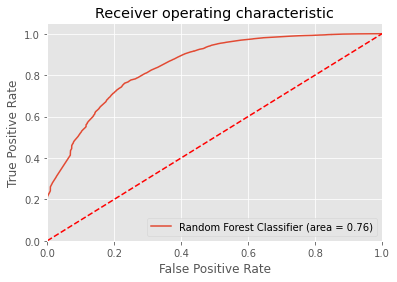

In [89]:
#plot out ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

clf_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest Classifier (area = %0.2f)' % clf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

The following code allows us to visually see what the various metrics are at different thresholds to evaluate an optimal threshold to maximize precision, recall and accuracy.

In [90]:
def getThreshold(y_test, probs, pos_label):
    probs = probs.T[1]
    actual = np.array([y_test == pos_label]).astype(int)[0]
    resultsdf = pd.DataFrame(data = {'Actual':actual, 'Probability':probs})
    tplist = []
    tnlist = []
    fplist = []
    fnlist = []
    threshlist = []
    for thresh in np.linspace(0,1,num=51):
        y_pred = probs > thresh
        tplist.append((resultsdf['Actual'] * y_pred).sum())
        tnlist.append(((1 - resultsdf['Actual']) * (1 - y_pred)).sum())
        fplist.append(((1 - resultsdf['Actual']) * y_pred).sum())
        fnlist.append((resultsdf['Actual'] * (1 - y_pred)).sum())
        threshlist.append(thresh)
    accdf = pd.DataFrame(data = {'Threshold':threshlist, 'TP':tplist, 'TN':tnlist, 'FP':fplist, 'FN':fnlist})
    accdf['Accuracy'] = (accdf['TP'] + accdf['TN']) / (accdf['TP'] + accdf['FP'] + accdf['TN'] + accdf['FN'])
    accdf['Precision'] = accdf['TP'] / (accdf['TP'] + accdf['FP'])
    accdf['Recall / Sensitivity'] = accdf['TP'] / (accdf['TP'] + accdf['FN'])
    accdf['Specificity'] = accdf['TN'] / (accdf['TN'] + accdf['TP'])
    accdf['F1'] = 2*((accdf['Precision'] * accdf['Recall / Sensitivity']) / (accdf['Precision'] + accdf['Recall / Sensitivity']))
    return accdf

In [91]:
accdf = getThreshold(y_test,clf.predict_proba(X_test),pos_label=1)
accdf

,Threshold,TP,TN,FP,FN,Accuracy,Precision,Recall / Sensitivity,Specificity,F1
0,0.00,58479,0,58478,0,0.500004,0.500004,1.000000,0.000000,0.666670
1,0.02,58479,0,58478,0,0.500004,0.500004,1.000000,0.000000,0.666670
2,0.04,58479,0,58478,0,0.500004,0.500004,1.000000,0.000000,0.666670
3,0.06,58479,2,58476,0,0.500021,0.500013,1.000000,0.000034,0.666678
4,0.08,58478,355,58123,1,0.503031,0.501522,0.999983,0.006034,0.668015
5,0.10,58469,718,57760,10,0.506058,0.503050,0.999829,0.012131,0.669334
6,0.12,58366,6949,51529,113,0.558453,0.531107,0.998068,0.106392,0.693290
7,0.14,58297,8151,50327,182,0.568140,0.536686,0.996888,0.122667,0.697737
8,0.16,58144,10170,48308,335,0.584095,0.546199,0.994271,0.148871,0.705071
9,0.18,58002,12470,46008,477,0.602546,0.557658,0.991843,0.176950,0.713919


By evaluating the table above, .58 was selected as the threshold to give us the max precison and accuracy on the test set

In [92]:
#.58 threshold has highest precision and accuracy
proba = clf.predict_proba(X_test)
test_threshold_predict = np.where(proba[:,1] > .58,1,0)

In [93]:
holdout_accdf = getThreshold(y_holdout,clf.predict_proba(X_holdout),pos_label=1)
holdout_accdf

,Threshold,TP,TN,FP,FN,Accuracy,Precision,Recall / Sensitivity,Specificity,F1
0,0.00,18196,0,40568,0,0.309645,0.309645,1.000000,0.000000,0.472869
1,0.02,18196,0,40568,0,0.309645,0.309645,1.000000,0.000000,0.472869
2,0.04,18196,0,40568,0,0.309645,0.309645,1.000000,0.000000,0.472869
3,0.06,18196,1,40567,0,0.309662,0.309651,1.000000,0.000055,0.472875
4,0.08,18193,265,40303,3,0.314104,0.311013,0.999835,0.014357,0.474443
5,0.10,18186,541,40027,10,0.318682,0.312404,0.999450,0.028889,0.476017
6,0.12,18111,4813,35755,85,0.390103,0.336223,0.995329,0.209955,0.502650
7,0.14,18066,5607,34961,130,0.402849,0.340694,0.992856,0.236852,0.507308
8,0.16,17990,6963,33605,206,0.424631,0.348677,0.988679,0.279045,0.515539
9,0.18,17906,8524,32044,290,0.449765,0.358478,0.984062,0.322512,0.525519


By plotting out the metrics against the threshold, we selected the threshold where we maximize precision, recall and accuracy.  The vertical black line in the plot below is the threshold and it intersects the point at which recall and precision meet.

In [94]:
#plot out the optimal threshold on the holdout set
source = holdout_accdf
source['opt'] = .56

base = alt.Chart(source)

#red
acc= base.mark_line(color="#fc030f").encode(
    x='Threshold:Q',
    y='Accuracy:Q'
)
#green
prec = base.mark_line(color="#136e1a").encode(
    x='Threshold:Q',
    y='Precision:Q'
)
#blue
rec = base.mark_line(color="#3a3b9c").encode(
    x='Threshold:Q',
    y='Recall / Sensitivity:Q'
)
#orange
spec = base.mark_line(color="#ebac00").encode(
    x='Threshold:Q',
    y='Specificity:Q'
)

optimal = base.mark_rule().encode(
    x='opt'
)
acc+prec+rec+spec+optimal

alt.LayerChart(...)

In [95]:
#.56 threshold has highest precision, recall and accuracy
proba = clf.predict_proba(X_holdout)
holdout_threshold_predict = np.where(proba[:,1] > 0.56,1,0)
holdout_threshold_predict

array([0, 0, 1, ..., 0, 0, 0])

### Performance Metrics

Below we can see the final performance of the model on the test set using the optimal threshold.  We get an overall model accuracy of .75 with a precision on the positive class at .79 while holding recall at .69.

In [96]:
#classification report on y_test using optimal thresholds
from sklearn.metrics import *

#Compute precision, recall, F-measure and support
print(classification_report(y_test,test_threshold_predict))

              precision    recall  f1-score   support

           0       0.72      0.82      0.77     58478
           1       0.79      0.69      0.74     58479

    accuracy                           0.75    116957
   macro avg       0.76      0.75      0.75    116957
weighted avg       0.76      0.75      0.75    116957



Below we can see the final performance of the model on the holdout set with a less spectacular result.  Only a .56 precision on the positive class while holding .55 recall and an overall model accuracy of .73.

In [97]:
#classification report on y_holdout
from sklearn.metrics import *

#Compute precision, recall, F-measure and support
print(classification_report(y_holdout,holdout_threshold_predict))

              precision    recall  f1-score   support

           0       0.80      0.81      0.80     40568
           1       0.56      0.55      0.55     18196

    accuracy                           0.73     58764
   macro avg       0.68      0.68      0.68     58764
weighted avg       0.72      0.73      0.73     58764



# Model Validation

### Model 1, Logistic Regression - Pros and Cons

|Area|Pros|Cons|
|:--|:--|:--|
|Efficiency|Faster than most other models. Optimization algorithm can be chosen for speed, such as Stochastic Average Gradient Descent.|Slower than Random Forest|
|Scalability|We can change the optimization algorithm easily to better fit our dataset size. Sklearn documentation suggests liblinear for small data sets and sag or saga for large ones.||
|Overfitting||Like linear regression, care must be taken to avoid overfitting a logistic regression problem. Cross Validation must be used.|
|Interpretability|The model coefficients will tell you what happens to the output of the model when increasing or decreasing a single variable|Requires normalization or a transformation to directly compare variables|
|Features||Categorical variables must be encoded as numeric|

We compared the test, training and holdout variable metrics to evaluation overall model performance

|Metric|Training/Test Set|Holdout Set|
|:--|:-:|:-:|
|Accuracy|70%|68%|
|Precision|70%|74%|
Recall|70%|67%|

### Model 2, Random Forest - Pros and Cons


|Area|Pros|Cons|
|:--|:--|:--|
|Efficiency|The algorithm is very fast to train||
|Scalability|Random Forest can handle large datasets and is still relatively fast to train a model||
|Overfitting|Literature claims it's difficult to overfit a random forest model|We've found that isn't necessarily true, a Random Forest model can be overfit and tuning parameters can help avoid this|
|Interpretability|Feature importance is helpful to know the information gain across features|It's difficult to know exactly what is happening in the forest|
|Features||Need to have discrimination power. i.e. features should have an unbalanced distribution across classes|


We compared the test, training and holdout variable metrics to evaluation overall model performance

|Metric|Training/Test Set|Holdout Set|
|:--|:-:|:-:|
|Accuracy|75%|73%|
|Precision|76%|68%|
Recall|75%|68%|

## Overall Interpretation

Both models did fairly well predicting non-violent crime correctly. Violent crime seemed to be harder for our models to predict correctly. Overall, the random forest performed better in terms of overall accuracy, precision and recall for the test set. Random forest performed better than logistic regression in terms of accuracy and recall in the holdout set, but the logisitic regression model performed better in terms of precision. Both models perform fairly well classifying crime as violent or non-violent, but if you were to choose one, we would recommend that you choose the random forest model. Not only does it perform slightly better, but it also runs significantly faster. 

## Practical Application

When the team considers how this model is useful, we think about response teams.  Understanding the variables that indicate a violent crime are paramount in keeping all involved as safe as possible.  When responding to a call at an apartment, it's prudent to understand that ambulatory support may be required.  When responding to crimes in public businesses, the response team could take less agressive tactics anticipating the type of criminal based on where the crime is reported as occuring.  Not only does this model accurately predict, it also gains insight so that law enforcement responding on a Sunday in the summer to a residence has the mental acquity to best handle the situation.